# INF-0334 - Tópicos em Engenharia de Software I (Machine Learning)

## Aula 2

- Redes Neurais Artificiais
- Visão geral e fundamentação teórica
- Experimento prático

## Redes Neurais Artificiais

<div style="text-align:justify">
Redes Neurais Artificiais são técnicas computacionais que apresentam um modelo matemático inspirado na estrutura neural de organismos inteligentes e que adquirem conhecimento através da experiência. Uma grande rede neural artificial pode ter centenas ou milhares de unidades de processamento; já o cérebro de um mamífero pode ter muitos bilhões de neurônios.
</div>
<br>
<div style="text-align:justify">
Um histórico resumido sobre Redes Neurais Artificiais deve começar por três das mais importantes publicações iniciais, desenvolvidas por: McCulloch e Pitts (1943), Hebb (1949), e Rosemblatt (1958). Estas publicações introduziram o primeiro modelo de redes neurais simulando máquinas, o modelo básico de rede de auto-organização, e o modelo Perceptron de aprendizado supervisionado, respectivamente. Alguns históricos sobre a área costumam “pular” os anos 60 e 70 e apontar um reínicio da área com a publicação dos trabalhos de Hopfield (1982) relatando a utilização de redes simétricas para otimização e de Rumelhart, Hinton e Williams que introduziram o poderoso método Backpropagation.
</div>
<br>
A seguir, algumas suas aplicações:

- Classificação
- Máquina de tradução
- Detecção de anomalias
- Reconhecimento de fala
- Processamento de imagens e visão computacional

## Fundamentação Teórica

<div style="text-align:justify">
Nesta aula vamos compreender os fundamentos teóricos envolvidos na construção de uma Rede Neural Artificial. Para isso, vamos nos apoiar em uma contextualização teórica leve; deixando de lado alguns formalismos matemáticos. Tais formalismos são essenciais para uma compreensão teórica profunda, mas não serão abordados nessa aula.
<div>

#### Arquitetura - Perceptron de Multiplas Camadas (MLP)

<figure>
  <img src="images/mlp.png">
  <figcaption style="text-align:center;font-style: italic;padding: 2px;">Figura 1 - Multilayer Perceptron (MLP).</figcaption>
</figure>

<div style="text-align:justify">
Na figura acima podemos observar uma rede que possui três camadas: Camada de entrada, camada oculta e camada de saída. A <u>camada de entrada</u> é onde os dados serão recebidos, cada neurônio dessa camada representa um atributo de informação, por exemplo: Imagine considerarmos os atributos (features): altura, comprimento, peso_medio, numero_patas e habitat para classificar se um animal é um mamífero. A camada de entrada terá o mesmo número de elementos que o número de atributos.
</div>
<br>
<div style="text-align:justify">
A <u>camada oculta</u> (ou camada intermediária) é considerada a camada de processamento dos dados. Em geral os neurônios dessa camada integram os sinais de entrada, ponderado-os pelos pesos W<sub>ij</sub> da camada anterior. Depois de integrar os sinais, aplicamos uma <code>função de transferência</code> e transferimos o sinal modificado para a camada seguinte.
</div>
<br>
<div style="text-align:justify">
O mesmo procedimento é repetido para todas as camadas ocultas (quando houver mais de uma) e para a <u>camada de saída</u>. A camada de saída também possui uma função de transferência, que geralmente é diferente da função de transferência utilizada nas camadas intermediárias. Veremos mais detalhes sobre isso a frente.
</div>
<br>
<div style="text-align:justify">
Denominamos <code>feed forward</code> a passagem de um sinal pela rede em direção à saída. Nós podemos escrever esse processo de maneira resumida através da forma matricial. Veja:
</div>

$$ Y = {\textbf{F}_1}(\sum_{i=0}^{n} X{\textbf{W}_1}^T).{\textbf{F}_2}(\sum_{i=0}^{n} {\textbf{W}_1}{\textbf{W}_2}^T) $$

#### Treinamento

<div style="text-align:justify">
O treinamento de uma rede neural artificial consiste em modificar os coeficientes W<sub>ij</sub>, de modo que ao propagar um novo sinal em direção à saída da rede (<code>feed forward</code>), esse sinal recebe uma classificação. Para tanto, precisamos introduzir dois novos elementos: a <code>função custo</code> e a <code>função de otimização</code>.
</div>
<br>
Vejamos a seguir um exemplo destas funções. Para simplificar nosso entendimento, vamos considerar uma rede neural sem camada oculta:

<figure>
  <img src="images/perceptron.png">
  <figcaption style="text-align:center;font-style: italic;padding: 2px;">Figura 2 - Single Perceptron (SLP).</figcaption>
</figure>

Neste caso, a propagação em direção à saída é dada por:

$$ Y = {\textbf{F}}(\sum_{i=0}^{n} X{\textbf{W}}^T) $$

A <b><u>função de custo</u></b> depende do conjunto de treinamento ($y_i$) e dos valores de predição ($\hat{y_i}$):

$$ J(\hat{y_i},y_i) = \frac{1}{M} \sum_{i=0}^{M-1} (\hat{y_i} - y_i)^2 $$

Trocando $\hat{y_i}$ pelo valor da predição, a função de custo depende das amostras de treinamento $x_i, y_i$ e 
do parâmetro de predição $w_i$:

$$ J(x_i,y_i,w_i) = \frac{1}{M} \sum_{i=0}^{M-1} ((w_0 + w_1\ x_i) - y_i)^2 $$ 

Buscamos encontrar os valores de $w_i$ para que $J(x_i,y_i,w_i)$ seja mínimo no conjunto de treinamento ($x_i, y_i$).

Em notação matricial, o cálculo do custo para $N$ amostras fica:

$$ \mathbf{E} = \hat{\mathbf{Y}} - \mathbf{Y} = \mathbf{X} \mathbf{W}^T - \mathbf{Y} $$

$$ J(\mathbf{W}) = \frac{1}{N} \left \Vert \mathbf{E} \right \|^2 $$

onde $\left \Vert \textbf{E} \right \|^2$ é a norma do vetor $\textbf{E}$ ao quadrado, dado por:
$\left \Vert \textbf{E} \right \|^2 = \sum_{i}{\textbf{E}_i}^2$

A seguir é mostrado uma implementação matricial desta função:

<u>Apenas para auxiliar no entendimento</u>:

Caso de apenas um $w^T = \begin{bmatrix} w_0 \\ w_1\end{bmatrix}$ com shape(2,1):

$$ \begin{matrix}
e &=& \begin{bmatrix}
1 & x_0 \\ 
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_{M-1}
\end{bmatrix} &
\begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix} &-& \begin{bmatrix}
y_0\\ 
y_1\\ 
\vdots\\ 
y_{M-1}\\ 
\end{bmatrix} &=& \begin{bmatrix}
e_0\\ 
e_1\\ 
\vdots\\ 
e_{M-1}\\ 
\end{bmatrix}\\
& & (M,2) & (2,1) & & (M,1) & & (M,1)
 \end{matrix} $$ 

$$ J = \frac{1}{M}\sum_{i=0}^{M-1} e_i^2 $$

<u>Otimizar a função custo, significa</u>:

<figure>
  <img src="images/grad_j.png">
  <figcaption style="text-align:center;font-style: italic;padding: 2px;">Figura 3 - Otimização da Função Custo.</figcaption>
</figure>

O gradiente da função custo ($\mathbf{\nabla{J_w}}$) para este caso onde 
$\mathbf{w}=\begin{bmatrix}w_0 & w_1\end{bmatrix}$ é um vetor de derivadas partiais:

$$ \mathbf{\nabla{J_w}} = \begin{bmatrix} \frac{\partial J}{\partial w_0} & \frac{\partial J}{\partial w_1}\end{bmatrix} $$

Vamos inicialmente calcular o gradiente para uma única amostra e depois iremos generalizar para $N$ amostras. O custo para uma amostra é dado por:

$$ J = (\hat{y} - y)^2 = (\begin{bmatrix} w_0 & w_1 \end{bmatrix}\begin{bmatrix} x_0 \\ x_1 \end{bmatrix}  - y)^2
     = (\mathbf{wx} - y)^2$$
     
$$ J = (w_0 x_0 + w_1 x_1 - y)^2 $$

$$ \frac{\partial J}{\partial w_0} = 2 x_0 (w_0 x_0 + w_1 x_1 - y) = 2 x_0 (\mathbf{wx} - y)$$
$$ \frac{\partial J}{\partial w_1} = 2 x_1 (w_0 x_0 + w_1 x_1 - y) = 2 x_1 (\mathbf{wx} - y)$$

$$\begin{bmatrix} \frac{\partial J}{\partial w_0} & \frac{\partial J}{\partial w_1}\end{bmatrix} =
\begin{bmatrix} 2 x_0 (\mathbf{wx} - y) & 2 x_1 (\mathbf{wx} - y)\end{bmatrix} = 2(\mathbf{wx} - y)\mathbf{x}^T
$$

Assim, o gradiente para uma amostra é dado por:
$$ \mathbf{\nabla{J_w}} = 2(\mathbf{wx} - y)\mathbf{x}^T $$

Vimos anteriormente que quando processamos com várias amostras simultaneamente, utilizamos a matrix $\mathbf{X}$
onde cada linha se refere a uma amostra transposta: ($\mathbf{x}^T$):

$$ \mathbf{X} = \begin{bmatrix}
\longleftarrow & (\mathbf{x}^{(0)})^T & \longrightarrow \\ 
\longleftarrow & (\mathbf{x}^{(1)})^T & \longrightarrow \\ 
  & \vdots  & \\ 
\longleftarrow & (\mathbf{x}^{(M-1)})^T & \longrightarrow 
\end{bmatrix} = \begin{bmatrix}
x_{0,0} & x_{0,1} \\
x_{1,0} & x_{1,1} \\
\vdots  & \vdots  \\ 
x_{M,0} & x_{M,1} \\
\end{bmatrix} $$

Assim, é preciso tirar a transposta da equação do gradiente para uma amostra, trocando o vetor 
$\mathbf{x}^T$ por $\mathbf{X}$ e o escalar $y$ por um vetor $\mathbf{y}^T$:

$$  (\mathbf{\nabla{J_w}})^T = \frac{2}{N}((\mathbf{WX^T} - \mathbf{Y}^T)\mathbf{X})^T $$,
$$  (\mathbf{\nabla{J_w}})^T = \frac{2}{N}\mathbf{X}^T(\mathbf{XW^T} - \mathbf{Y}) $$

Na equação da atualização do $\mathbf{W}$ a seguir, o fator $\eta$ é denominado *learning rate*. Ele é um parâmetro de ajuste fundamental para o sucesso da otimização: 

$$ \mathbf{W}^T = \mathbf{W}^T − \eta (\mathbf{\nabla J_w})^T $$

Desta forma então, calculando-se o gradiente de $J(\mathbf{W})$ e substituindo na equação acima temos:

$$ \mathbf{W}^T = \mathbf{W}^T − \eta \frac{2}{N}(\mathbf{X}^T(\mathbf{X}\mathbf{W}^T−\mathbf{Y})) $$

Observe que cada atualização dos pesos, o cálculo do gradiente leva em conta todas as amostras
de dados que estão representados na matriz $\mathbf{X}$ que possui $N$ linhas (amostras).

## Experimento Prático

<div style="text-align:justify">
Neste experimento prático vamos utilizar o conjunto de dados <a href="https://archive.ics.uci.edu/ml/datasets/iris">Iris</a>.
</div>

### Carregando Pacotes

In [1]:
%matplotlib inline

import pandas, numpy
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from time import time

plt.rcParams['figure.figsize'] = [15, 7]

### Carregando Dados

In [2]:
df = pandas.read_csv('datasets/iris.csv', header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

### Normalizando Atributos

Nomalizando os dados para garantir que as medidas numéricas esteja no domínio do modelo.

In [4]:
y = df.iloc[0:100, 4].values
y = numpy.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

X_std = numpy.copy(X)

X_std[:,0] = (X[:,0] - X[:,0].min()) / X[:,0].max()
X_std[:,1] = (X[:,1] - X[:,1].min()) / X[:,1].max()

### Gradiente Descendente Estocástico

In [5]:
class NeuralNetworkSGD(object):

    def __init__(self, eta = 0.01, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights = True):

        if reinitialize_weights:
            self.w_ = numpy.zeros(1 + X.shape[1])
            
        self.cost_ = []

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error

            cost = ((y - self.activation(X))**2).mean() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return numpy.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        print('Coeficientes: {}'.format(self.w_))
        return numpy.where(self.activation(X) >= 0.0, 1, -1)

### Representação Gráfica

Coeficientes: [-0.33185055  0.21652137  1.02351543]


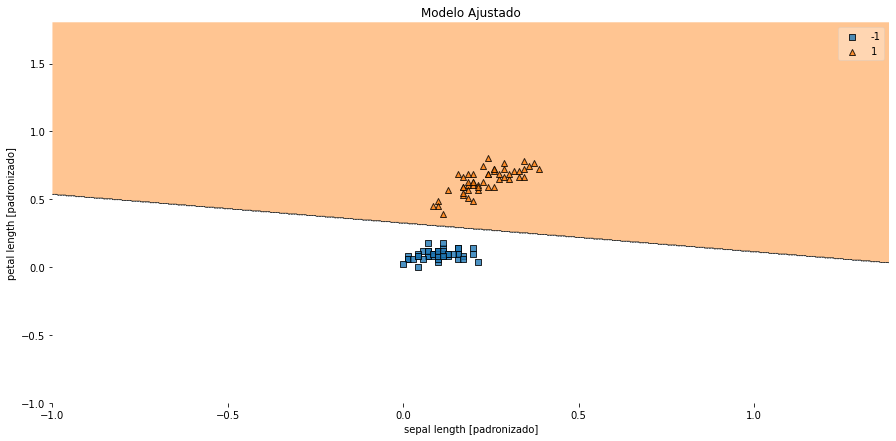

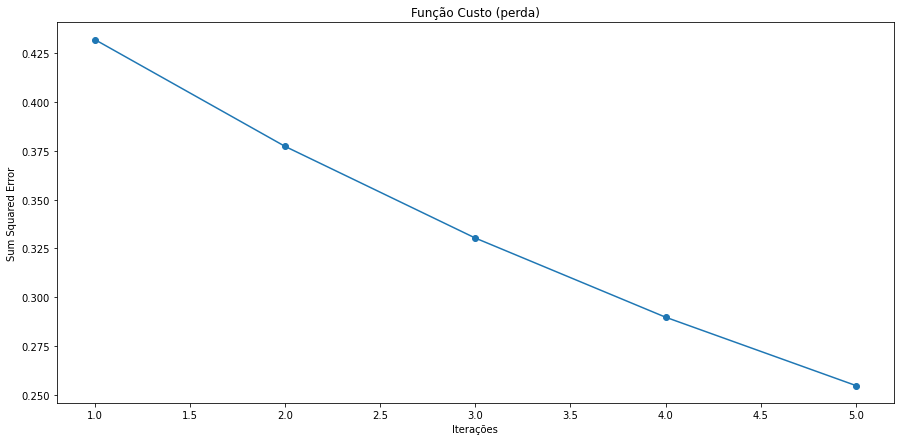

In [6]:
# Modelo
model = NeuralNetworkSGD(epochs = 5, eta = 0.01)

# Dados randômicos
numpy.random.seed(123)
idx = numpy.random.permutation(len(y))
X_shuffled, y_shuffled =  X_std[idx], y[idx]

# Treinamento e Plot
model.train(X_shuffled, y_shuffled)
plot_decision_regions(X_shuffled, y_shuffled, clf=model)
plt.title('Modelo Ajustado')
plt.xlabel('sepal length [padronizado]')
plt.ylabel('petal length [padronizado]')
plt.show()

plt.title('Função Custo (perda)')
plt.plot(range(1, len(model.cost_) + 1), model.cost_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error')
plt.show()